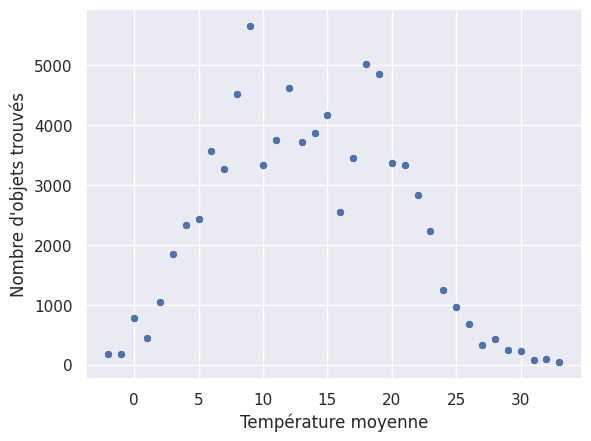

In [35]:
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# Connexion à la base de données
conn = sqlite3.connect('SNCF_LOST.db')
c = conn.cursor()

# Requête SQL pour récupérer le nombre d'objets trouvés et la température moyenne
# en joignant les tables "ObjetPerdu" et "Temperature" sur la colonne "Date"
query = """
SELECT Temperature.TempMed, COUNT(ObjetPerdu.id) AS count_objet
FROM ObjetPerdu
JOIN Temperature ON ObjetPerdu.Date = Temperature.Date
GROUP BY Temperature.TempMed
"""

# Exécution de la requête SQL
c.execute(query)

# Récupération des résultats de la requête
results = c.fetchall()

# Fermeture de la connexion à la base de données
conn.close()

# Création du scatterplot avec Seaborn
sns.set(style='darkgrid')
sns.scatterplot(x=[result[0] for result in results], y=[result[1] for result in results])
plt.xlabel('Température moyenne')
plt.ylabel('Nombre d\'objets trouvés')
plt.show()




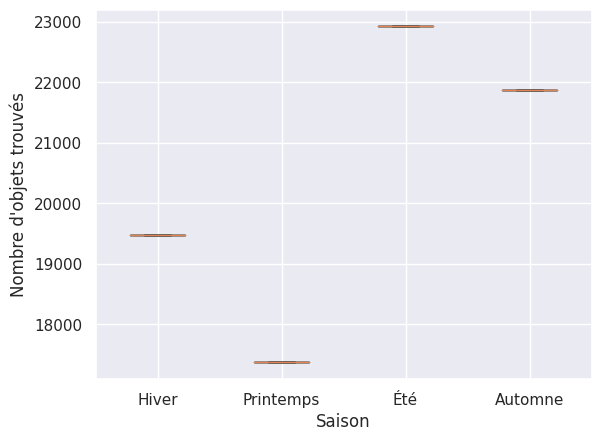

In [38]:
import sqlite3
import matplotlib.pyplot as plt

# Connexion à la base de données
conn = sqlite3.connect('SNCF_LOST.db')
c = conn.cursor()

# Requête SQL pour calculer la médiane du nombre d'objets trouvés par saison
query = """
SELECT CASE WHEN strftime('%m', ObjetPerdu.Date) IN ('12','01','02') THEN 'Hiver'
            WHEN strftime('%m', ObjetPerdu.Date) IN ('03','04','05') THEN 'Printemps'
            WHEN strftime('%m', ObjetPerdu.Date) IN ('06','07','08') THEN 'Été'
            WHEN strftime('%m', ObjetPerdu.Date) IN ('09','10','11') THEN 'Automne' END AS season,
       COUNT(id) AS count_objet
FROM ObjetPerdu
GROUP BY season
"""

# Exécution de la requête SQL
c.execute(query)

# Récupération des résultats de la requête
results = c.fetchall()

# Fermeture de la connexion à la base de données
conn.close()

# Création du boxplot
labels = ['Hiver', 'Printemps', 'Été', 'Automne']
data = [[result[1] for result in results if result[0] == label] for label in labels]
plt.boxplot(data, labels=labels)
plt.xlabel('Saison')
plt.ylabel('Nombre d\'objets trouvés')
plt.show()



2023-04-13 11:03:53.268 
  command:

    streamlit run /home/apprenant/Documents/DEV_IA/SNCF_BRIEF/SNCF_LOST/venv/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

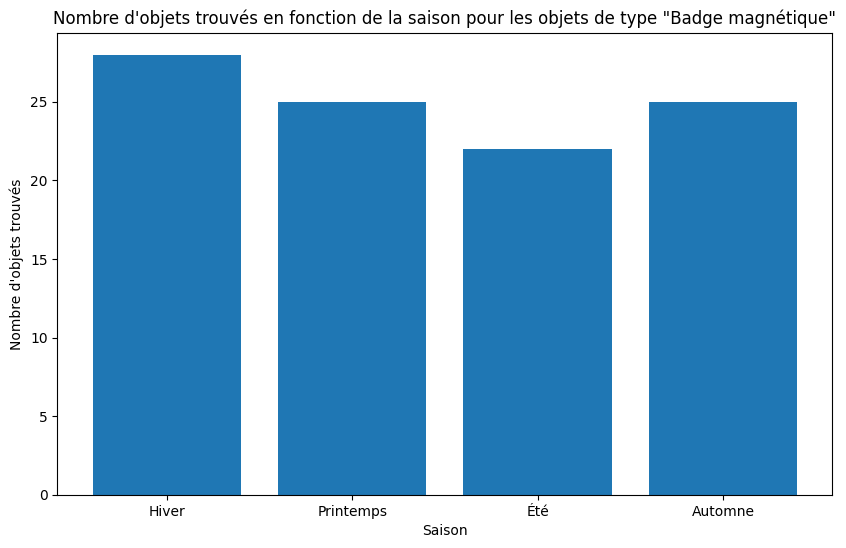

In [2]:
import sqlite3
import matplotlib.pyplot as plt
import streamlit as st

# Connexion à la base de données
conn = sqlite3.connect('SNCF_LOST.db')
c = conn.cursor()

# Requête SQL pour compter le nombre d'objets trouvés par saison et par type d'objet
query = """
SELECT CASE WHEN strftime('%m', ObjetPerdu.Date) IN ('12','01','02') THEN 'Hiver'
            WHEN strftime('%m', ObjetPerdu.Date) IN ('03','04','05') THEN 'Printemps'
            WHEN strftime('%m', ObjetPerdu.Date) IN ('06','07','08') THEN 'Été'
            WHEN strftime('%m', ObjetPerdu.Date) IN ('09','10','11') THEN 'Automne' END AS season,
       TypeObjet,
       COUNT(id) AS count_objet
FROM ObjetPerdu
GROUP BY season, TypeObjet
"""

# Exécution de la requête SQL
c.execute(query)

# Récupération des résultats de la requête
results = c.fetchall()

# Fermeture de la connexion à la base de données
conn.close()

# Préparation des données pour l'affichage
labels = ['Hiver', 'Printemps', 'Été', 'Automne']
types_objet = list(set(result[1] for result in results))
data = {type_objet: [result[2] for result in results if result[1] == type_objet] for type_objet in types_objet}

# Interface utilisateur Streamlit pour sélectionner le type d'objet
selected_type_objet = st.selectbox('Sélectionnez un type d\'objet', types_objet)

# Filtrer les données en fonction du type d'objet sélectionné
filtered_data = {season: data[selected_type_objet][i] if i < len(data[selected_type_objet]) else 0 for i, season in enumerate(labels)}

# Création du graphique
fig, ax = plt.subplots()
ax.bar(filtered_data.keys(), filtered_data.values())

ax.set_xlabel('Saison')
ax.set_ylabel('Nombre d\'objets trouvés')
ax.set_title(f'Nombre d\'objets trouvés en fonction de la saison pour les objets de type "{selected_type_objet}"')
fig.set_size_inches(10, 6)
# Affichage du graphique dans Streamlit
st.pyplot(fig)
